In [26]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

In [27]:
df = pd.read_csv("/Users/liuzhengyong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/my part fo/Data/listings.csv")
# selected_columns = df[['latitude', 'longitude']]
# # 将CSV数据转换为GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

/var/folders/60/b7504ly50v1_fz0lr9fy5tt00000gn/T/ipykernel_42548/2382313410.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/liuzhengyong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/my part fo/Data/listings.csv")


In [28]:
# 读取伦敦的Shapefile
london_shapefile = '/Users/liuzhengyong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/my part fo/Data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
london_map = gpd.read_file(london_shapefile)

geo_df = gpd.GeoDataFrame(df, geometry=geometry)
geo_df.crs = 'EPSG:4326'  # 设置为WGS 84坐标系

# 确认伦敦shapefile的CRS
london_map_crs = london_map.crs

# 将点数据集转换为shapefile的CRS
geo_df = geo_df.to_crs(london_map_crs)


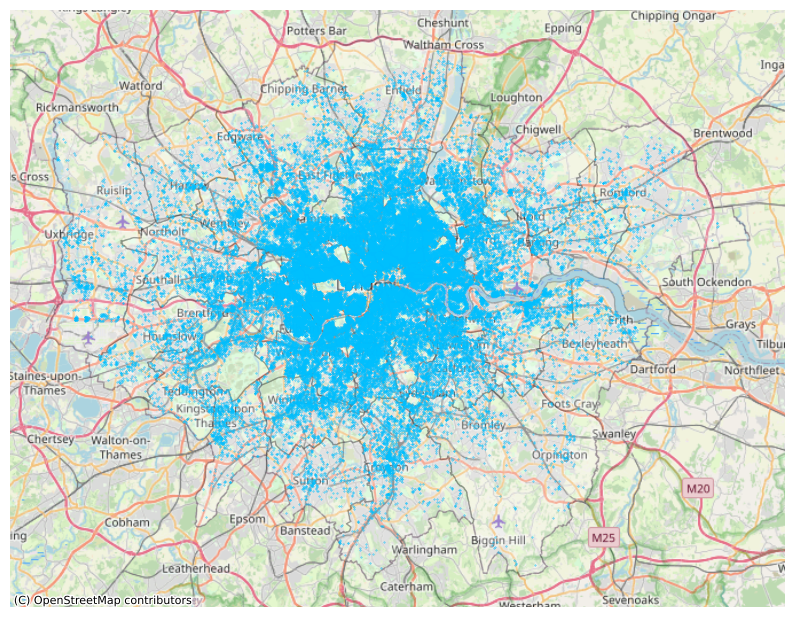

In [29]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# 假设geo_df和london_map已经设置了正确的CRS为EPSG:4326
# ...

# 绘制地图
fig, ax = plt.subplots(figsize=(10, 10))

# 将数据转换为Web Mercator
london_map = london_map.to_crs(epsg=3857)
geo_df = geo_df.to_crs(epsg=3857)

# 绘制shapefile和点
london_map.plot(ax=ax, color='white', edgecolor='black', alpha=0.2)
geo_df.plot(ax=ax, markersize=0.1, color='deepskyblue', marker='o')

# 添加OpenStreetMap底图
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# 移除坐标轴
ax.set_axis_off()

# 展示地图
plt.show()
